# Convolutional Net

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
import tensorflow asi tf

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [0]:
x_train = (x_train / 255).reshape((60000, 28, 28, 1))
x_test = (x_test / 255).reshape((10000, 28, 28, 1))

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                     input_shape=x_train.shape[1:]),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax'),
])

In [0]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2487 - accuracy: 0.9245 - val_loss: 0.0590 - val_accuracy: 0.9810
Epoch 2/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0858 - accuracy: 0.9746 - val_loss: 0.0381 - val_accuracy: 0.9867
Epoch 3/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0632 - accuracy: 0.9806 - val_loss: 0.0300 - val_accuracy: 0.9894
Epoch 4/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0553 - accuracy: 0.9828 - val_loss: 0.0301 - val_accuracy: 0.9901
Epoch 5/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0442 - accuracy: 0.9863 - val_loss: 0.0281 - val_accuracy: 0.9916
Epoch 6/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0421 - accuracy: 0.9865 - val_loss: 0.0316 - val_accuracy: 0.9897
Epoch 7/10
60000/60000 [==============================]

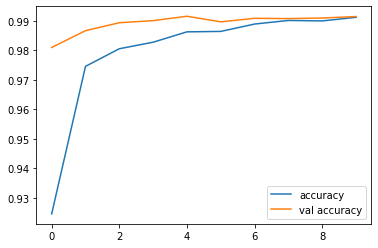

In [9]:
plot(history.history['accuracy'], label='accuracy')
plot(history.history['val_accuracy'], label='val accuracy')
legend()

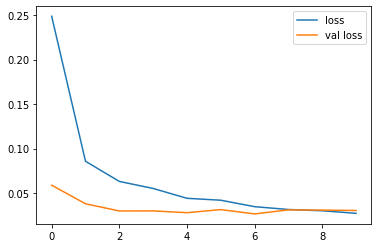

In [10]:
plot(history.history['loss'], label='loss')
plot(history.history['val_loss'], label='val loss')
legend()